In [2]:
from scipy import ndimage
import scipy
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import matplotlib

## Loading an Image

We will use the matplotlib.image library for loading the image from our computer.



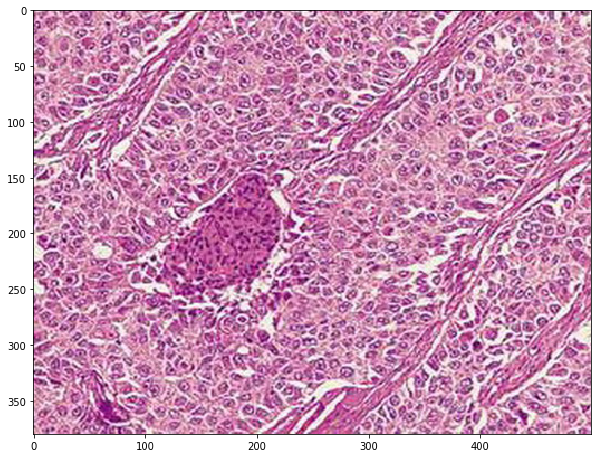

In [3]:
# Load an image
image = mpimg.imread("Images/Cancer.jpg")

# Display the loaded image
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

## Display the Red, Blue and Green channel separately

As you saw in the lecture, a coloured image is made of red, green and blue channels. Let us view each channel separately for the loaded image.

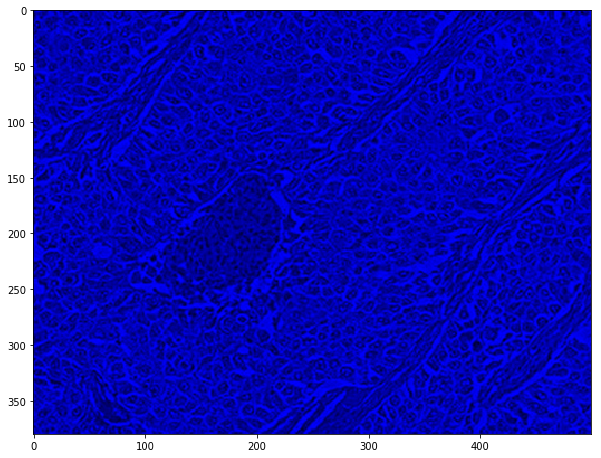

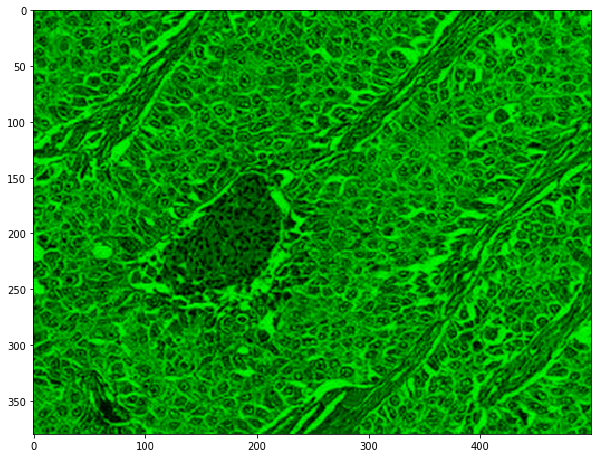

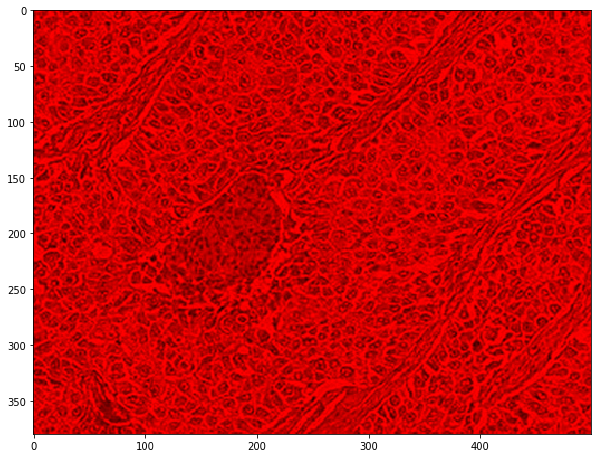

In [4]:
b = image.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0

g = image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = image.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0

# Red channel
plt.figure(figsize=(10,10))
plt.imshow(r)
plt.show()

# Green channel
plt.figure(figsize=(10,10))
plt.imshow(g)
plt.show()

# Blue channel
plt.figure(figsize=(10,10))
plt.imshow(b)
plt.show()


Let us also see how the image would look in grayscale.

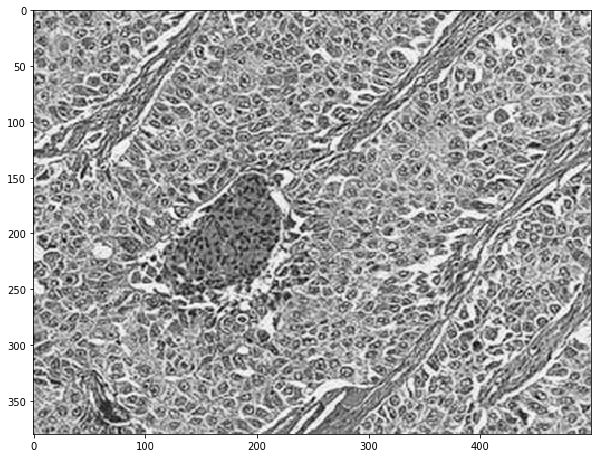

In [5]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray_cancer = rgb2gray(image)
plt.figure(figsize=(10,10))
plt.imshow(gray_cancer, cmap='gray')
plt.show()

## Sobel Filter

The Sobel filter is used in image processing and computer vision, particularly within edge detection algorithms where it creates an image emphasising edges.

In [6]:
# apply convolution operation
def convolve_Img(img, fi):
    return ndimage.correlate(img, fi, mode='constant', cval=1.0)

# Horizontal edge detection
def grad_x(img):
    Kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
    
    return convolve_Img(img, Kx)

# Vertical edge detection
def grad_y(img):
    Ky = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])
    
    return convolve_Img(img, Ky)


def sobel_filter(img):
    img = rgb2gray(img)
    img = np.array(img)
    
    # horizontal
    x_img = grad_x(img)
    
    # vertical
    y_img = grad_y(img)
    
    # combine
    sob = np.hypot(x_img, y_img)
    
    return sob



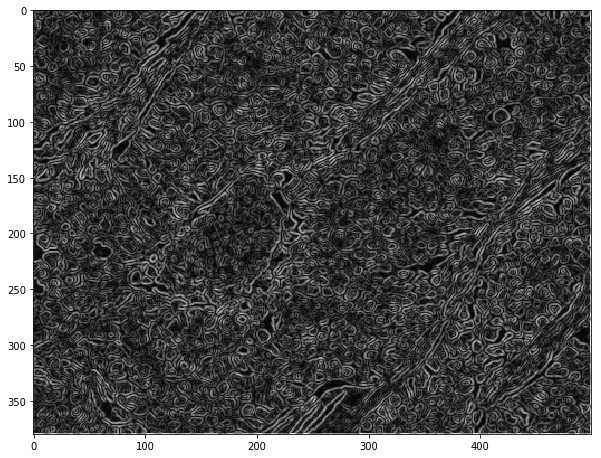

In [7]:
sobel_image = sobel_filter(image)
plt.figure(figsize=(10,10))
plt.imshow(sobel_image, cmap='gray')
plt.show()

## Blurring and De-blurring

We can also use filters to blur and deblur an image.

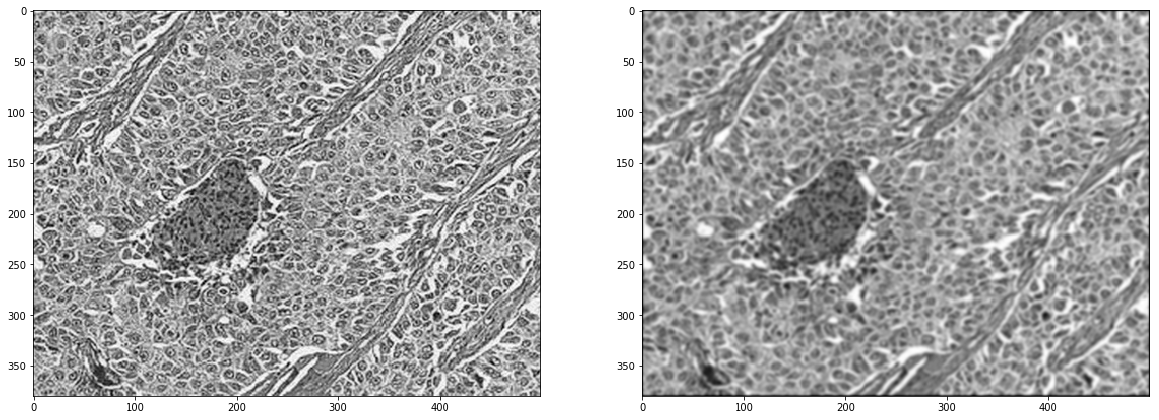

In [8]:
# Blurring Image

blur_filter = np.array([[1/9, 1/9, 1/9], 
                         [1/9, 1/9, 1/9], 
                         [1/9, 1/9, 1/9]])

def blurring(image, degree=3):
    '''
    image: input image
    degree: how much blurring you want
    '''
    image = rgb2gray(image)
    image = np.array(image)
    blurred_image = image
    for i in range(degree):
        blurred_image = convolve_Img(blurred_image, blur_filter)
    
    return blurred_image

blurredImg = blurring(image)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
gray_cancer = rgb2gray(image)
ax1.imshow(gray_cancer, cmap='gray')
ax2.imshow(blurredImg, cmap='gray')
plt.show()

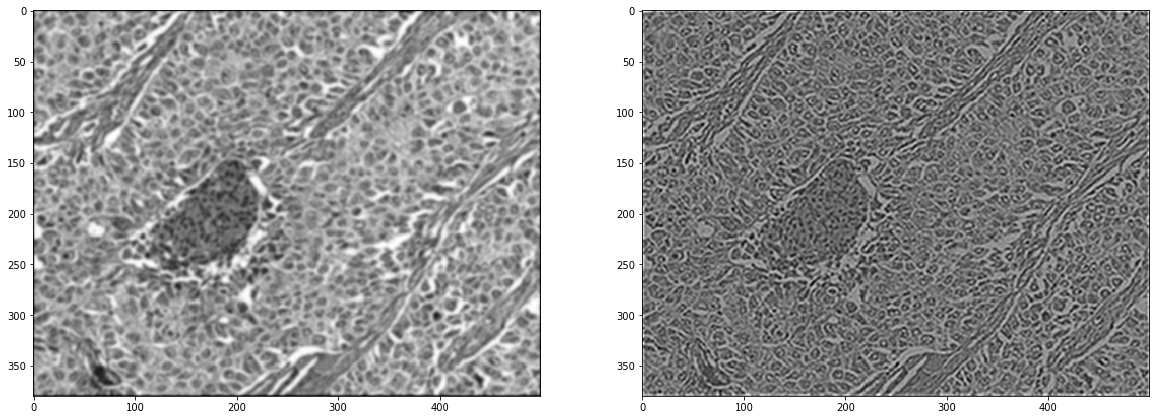

In [9]:
# De-blurring Image
blurredImg = blurredImg 
deblur_filter = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

def deblurring(image, degree=3):
    '''
    image: input blurred image
    degree: how much deblurring you want
    '''
    
    deblurred_image = image
    for i in range(degree):
        deblurred_image = convolve_Img(deblurred_image, deblur_filter)
    
    return deblurred_image

deblurredImg = deblurring(blurredImg)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

# display the blurred image
ax1.imshow(blurredImg, cmap='gray')

# display deblurred image
ax2.imshow(deblurredImg, cmap='gray')
plt.show()